## Wrangling parks data

### Goals of the Task


The parks and recreation data consists of two data sets. 

- The smaller data set contains address, longitude and latitude for Seattle parks (each row is a park). 
- The second data set (features) indicates which facilities a park has (each row is a facility in a park) such as picnic areas, basketball courts and football pitches. 

The aim of this task is to combine and reshape the data into a wide rather than long frame where each row is a park, and there is a Boolean column for each feature type. 

#### Step 1 : use pandas to read the parks and features data files into data frames
- import pandas as pd 
- use pandas read_csv to create a parks data frame and a facilities data frame 
- ensure you are pointing at the correct file path for the data source (you may have to navigate in your notebook!) 


In [99]:
import pandas as pd

In [100]:
parks = pd.read_csv('Seattle_Parks_And_Recreation_Park_Addresses.csv')

In [101]:
features = pd.read_csv('Seattle_Parks_and_Recreation_Parks_Features.csv')

In [102]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PMAID       412 non-null    int64  
 1   LocID       412 non-null    int64  
 2   Name        412 non-null    object 
 3   Address     412 non-null    object 
 4   ZIP Code    412 non-null    int64  
 5   X Coord     412 non-null    float64
 6   Y Coord     412 non-null    float64
 7   Location 1  412 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 25.9+ KB


In [103]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PMAID         1558 non-null   int64  
 1   Name          1558 non-null   object 
 2   Alt_Name      222 non-null    object 
 3   xPos          1521 non-null   float64
 4   yPos          1522 non-null   float64
 5   Feature_ID    1558 non-null   int64  
 6   hours         1555 non-null   object 
 7   Feature_Desc  1558 non-null   object 
 8   CHILD_DESC    638 non-null    object 
 9   FIELD_TYPE    216 non-null    object 
 10  YOUTH_ONLY    1558 non-null   bool   
 11  LIGHTING      1558 non-null   bool   
 12  Location 1    1521 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(7)
memory usage: 137.1+ KB


In [104]:
parks.head()

,PMAID,LocID,Name,Address,ZIP Code,X Coord,Y Coord,Location 1
0,281,2545,12th and Howe Play Park,1200 W Howe St,98119,-122.372985,47.636097,"(47.636097, -122.372985)"
1,4159,2387,12th Ave S Viewpoint,2821 12TH Ave S,98144,-122.317765,47.577953,"(47.577953, -122.317765)"
2,4467,2382,12th Ave Square Park,564 12th Ave,98122,-122.316455,47.607427,"(47.607427, -122.316455)"
3,4010,2546,14th Ave NW Boat Ramp,4400 14th Ave NW,98107,-122.373536,47.660775,"(47.660775, -122.373536)"
4,296,296,3001 E Madison,3001 E Madison St,98112,-122.293173,47.625169,"(47.625169, -122.293173)"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pmaid         1558 non-null   int64  
 1   name          1558 non-null   object 
 2   alt_name      222 non-null    object 
 3   xpos          1521 non-null   float64
 4   ypos          1522 non-null   float64
 5   feature_id    1558 non-null   int64  
 6   hours         1555 non-null   object 
 7   feature_desc  1558 non-null   object 
 8   child_desc    638 non-null    object 
 9   field_type    216 non-null    object 
 10  youth_only    1558 non-null   bool   
 11  lighting      1558 non-null   bool   
 12  location 1    1521 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(7)
memory usage: 137.1+ KB


In [193]:
featuresx = features.loc[features['name'] == 'Atlantic Street Park'].values[0]
featuresx

array([4243, 'Atlantic Street Park', nan, -122.30566, 47.589165, 74,
       '4 a.m. - 11:30 p.m.', 'Adult Fitness Equipment',
       'Adult Fitness Equipment', nan, False, False,
       '1501 21st Ave S\n(-122.30566, 47.589165)'], dtype=object)

#### Step 2 : reformat the column headers in lower case 

- the two data sets have some inconsistencies in the header case used on columns so this should be fixed using the str.lower() method. 

    - example : df.columns = df.columns.str.lower() function 

In [106]:
parks.columns=parks.columns.str.lower()

In [107]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pmaid       412 non-null    int64  
 1   locid       412 non-null    int64  
 2   name        412 non-null    object 
 3   address     412 non-null    object 
 4   zip code    412 non-null    int64  
 5   x coord     412 non-null    float64
 6   y coord     412 non-null    float64
 7   location 1  412 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 25.9+ KB


In [108]:
features.columns=features.columns.str.lower()

In [109]:
features.head()

,pmaid,name,alt_name,xpos,ypos,feature_id,hours,feature_desc,child_desc,field_type,youth_only,lighting,location 1
0,281,12th and Howe Play Park,NaN,-122.372985,47.636097,22,6 a.m. - 10 p.m.,Play Area,Play Area,NaN,False,False,"1200 W Howe St\n(-122.372985, 47.636097)"
1,4159,12th Ave S Viewpoint,NaN,-122.317765,47.577953,34,6 a.m. - 10 p.m.,View,NaN,NaN,False,False,"2821 12TH Ave S\n(-122.317765, 47.577953)"
2,4010,14th Ave NW Boat Ramp,NaN,-122.373536,47.660775,7,4 a.m. - 11:30 p.m.,Boat Launch (Hand Carry),NaN,NaN,False,False,"4400 14th Ave NW\n(-122.373536, 47.660775)"
3,4010,14th Ave NW Boat Ramp,NaN,-122.373536,47.660775,6,4 a.m. - 11:30 p.m.,Boat Launch (Motorized),NaN,NaN,False,False,"4400 14th Ave NW\n(-122.373536, 47.660775)"
4,4010,14th Ave NW Boat Ramp,NaN,-122.373536,47.660775,36,4 a.m. - 11:30 p.m.,Waterfront,NaN,NaN,False,False,"4400 14th Ave NW\n(-122.373536, 47.660775)"


#### Step 3 : join the data frames together 

- use the pandas merge method to combine the two data frames into a new single data frame
- use the pmaid column as the merge key

https://www.geeksforgeeks.org/merge-two-pandas-dataframes-by-matched-id-number/ 

In [110]:
park_features = pd.merge(parks, features, on = 'pmaid', how='outer')

In [111]:
park_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pmaid         1664 non-null   int64  
 1   locid         1652 non-null   float64
 2   name_x        1652 non-null   object 
 3   address       1652 non-null   object 
 4   zip code      1652 non-null   float64
 5   x coord       1652 non-null   float64
 6   y coord       1652 non-null   float64
 7   location 1_x  1652 non-null   object 
 8   name_y        1558 non-null   object 
 9   alt_name      222 non-null    object 
 10  xpos          1521 non-null   float64
 11  ypos          1522 non-null   float64
 12  feature_id    1558 non-null   float64
 13  hours         1555 non-null   object 
 14  feature_desc  1558 non-null   object 
 15  child_desc    638 non-null    object 
 16  field_type    216 non-null    object 
 17  youth_only    1558 non-null   object 
 18  lighting      1558 non-null 

In [112]:
park_features.head()

,pmaid,locid,name_x,address,zip code,x coord,y coord,location 1_x,name_y,alt_name,xpos,ypos,feature_id,hours,feature_desc,child_desc,field_type,youth_only,lighting,location 1_y
0,281,2545.0,12th and Howe Play Park,1200 W Howe St,98119.0,-122.372985,47.636097,"(47.636097, -122.372985)",12th and Howe Play Park,NaN,-122.372985,47.636097,22.0,6 a.m. - 10 p.m.,Play Area,Play Area,NaN,False,False,"1200 W Howe St\n(-122.372985, 47.636097)"
1,4159,2387.0,12th Ave S Viewpoint,2821 12TH Ave S,98144.0,-122.317765,47.577953,"(47.577953, -122.317765)",12th Ave S Viewpoint,NaN,-122.317765,47.577953,34.0,6 a.m. - 10 p.m.,View,NaN,NaN,False,False,"2821 12TH Ave S\n(-122.317765, 47.577953)"
2,4467,2382.0,12th Ave Square Park,564 12th Ave,98122.0,-122.316455,47.607427,"(47.607427, -122.316455)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4010,2546.0,14th Ave NW Boat Ramp,4400 14th Ave NW,98107.0,-122.373536,47.660775,"(47.660775, -122.373536)",14th Ave NW Boat Ramp,NaN,-122.373536,47.660775,7.0,4 a.m. - 11:30 p.m.,Boat Launch (Hand Carry),NaN,NaN,False,False,"4400 14th Ave NW\n(-122.373536, 47.660775)"
4,4010,2546.0,14th Ave NW Boat Ramp,4400 14th Ave NW,98107.0,-122.373536,47.660775,"(47.660775, -122.373536)",14th Ave NW Boat Ramp,NaN,-122.373536,47.660775,6.0,4 a.m. - 11:30 p.m.,Boat Launch (Motorized),NaN,NaN,False,False,"4400 14th Ave NW\n(-122.373536, 47.660775)"


#### step 4: drop unneccesary columns

the columns we want to keep in the resulting data frame are 

- zip code
- x coord
- y coord
- locid (location id) 
- name (park name) 
- pmaid (park id) 
- feature_id (facility id) 
- feature_desc (facility description)

drop all remaining columns

In [113]:
park_features.drop(['address','location 1_x','name_y','alt_name','xpos','ypos','hours','child_desc','field_type',
                    'youth_only','lighting','location 1_y'], axis = 1, inplace=True)

In [114]:
park_features

,pmaid,locid,name_x,zip code,x coord,y coord,feature_id,feature_desc
0,281,2545.0,12th and Howe Play Park,98119.0,-122.372985,47.636097,22.0,Play Area
1,4159,2387.0,12th Ave S Viewpoint,98144.0,-122.317765,47.577953,34.0,View
2,4467,2382.0,12th Ave Square Park,98122.0,-122.316455,47.607427,NaN,NaN
3,4010,2546.0,14th Ave NW Boat Ramp,98107.0,-122.373536,47.660775,7.0,Boat Launch (Hand Carry)
4,4010,2546.0,14th Ave NW Boat Ramp,98107.0,-122.373536,47.660775,6.0,Boat Launch (Motorized)
...,...,...,...,...,...,...,...,...
1659,412,NaN,NaN,NaN,NaN,NaN,15.0,Fishing
1660,412,NaN,NaN,NaN,NaN,NaN,15.0,Fishing
1661,412,NaN,NaN,NaN,NaN,NaN,18.0,Historic Landmark
1662,412,NaN,NaN,NaN,NaN,NaN,36.0,Waterfront


In [115]:
park_features.feature_desc.unique()

array(['Play Area', 'View', nan, 'Boat Launch (Hand Carry)',
       'Boat Launch (Motorized)', 'Waterfront',
       'Play Area (ADA Compliant)', 'Paths', 'Fire Pit',
       'Paths (ADA Compliant)', 'Picnic Sites', 'Rental Facility',
       'Restrooms', 'Restrooms (ADA Compliant)', 'Soccer',
       'Basketball (Half)', 'Tennis Court (Outdoor)', 'Tennis Lights',
       'Pesticide Free', 'Baseball/Softball', 'Community Center',
       'Green Space', 'Woods', 'Adult Fitness Equipment',
       'Basketball (Full)', 'Skatepark', 'Wading Pool or Water Feature',
       'Pool (Indoor)', 'Tennis Backboard (Outdoor)', 'Historic Landmark',
       'P-Patch Community Garden', 'Weddings and Ceremonies', 'Fishing',
       'T-Ball', 'Dog Off Leash Area', 'Community Building', 'Garden',
       'Environmental Learning Center', 'Hiking Trails', 'Creek',
       'Picnic Sites (ADA Compliant)', 'Football', 'Skate Dot',
       'U-8 Soccer', 'Track', 'Decorative Fountain', 'Golf',
       'Guarded Beach', 'Skate

In [116]:
unique_pf = park_features.drop_duplicates(subset='feature_desc', ignore_index=True)

In [128]:
unique_pf.head()

,pmaid,locid,name_x,zip code,x coord,y coord,feature_id,feature_desc
0,281,2545.0,12th and Howe Play Park,98119.0,-122.372985,47.636097,22.0,Play Area
1,4159,2387.0,12th Ave S Viewpoint,98144.0,-122.317765,47.577953,34.0,View
2,4467,2382.0,12th Ave Square Park,98122.0,-122.316455,47.607427,NaN,NaN
3,4010,2546.0,14th Ave NW Boat Ramp,98107.0,-122.373536,47.660775,7.0,Boat Launch (Hand Carry)
4,4010,2546.0,14th Ave NW Boat Ramp,98107.0,-122.373536,47.660775,6.0,Boat Launch (Motorized)


#### step 5: examine and clean the feature column

- examine the feature_desc column using the pandas function unique()
- note that this column contains a description of just one facility that a park contains
- this means each park has multiple rows (one row for each park facility)
- in some cases you will also see duplicates- this is due to the presence of columns you removed earlier
- for example, Alki Beach Park (PMAID 445)  has 
    - 2 x boat launches (hand carry)
    - a fire pit
    - 2 x paths
    - picnic sites
    - 2 x restrooms
    - a view
    - a waterfont
- first, de duplicate the data frame to remove duplicate feature listings
- remember to reset the index of your data frame after dropping duplicate rows

In [133]:
unique_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pmaid         69 non-null     int64  
 1   locid         69 non-null     float64
 2   name_x        69 non-null     object 
 3   zip code      69 non-null     float64
 4   x coord       69 non-null     float64
 5   y coord       69 non-null     float64
 6   feature_id    68 non-null     float64
 7   feature_desc  68 non-null     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 4.4+ KB


In [119]:
#df

#### step 6 : turn the feature column into multiple boolean facility 1/0 columns

- we want a list of parks alongside columns for all the possible features, showing which feature each park contains
- there are 68 feature described in total, and you will see that some features are very similar (eg basketball(full)/ basketball(half)) so OPTIONALLY you can pause here to reduce those features using text analysis methods you learnt in topic 8. 
- use the pandas pivot_table method to pivot the feature desciption column into multiple columns which will change the shape of the data from long to wide

    - example:  pd.pivot_table(df, index=[park], columns=[feature],aggfunc="count")

- replace the NaN entries in the resulting df with 0 with the pandas fillna() method 

In [155]:
df_pivot =  pd.pivot_table(unique_pf, index=['name_x'], columns=['feature_desc'], values=['feature_id'], aggfunc="count", fill_value=0)

In [168]:
df_pivot.head(10)

feature_id                 \
feature_desc            Adult Fitness Equipment BMX Dirt Jumps   
name_x                                                           
12th Ave S Viewpoint                          0              0   
12th and Howe Play Park                       0              0   
14th Ave NW Boat Ramp                         0              0   
6th Ave NW Pocket Park                        0              0   
A. B. Ernst Park                              0              0   
Alki Beach Park                               0              0   
Alki Playground                               0              0   
Arroyos Natural Area                          0              0   
Atlantic Street Park                          1              0   
B.F. Day Playground                           0              0   

                                                                               \
feature_desc            Baseball/Softball Basketball (Full) Basketball (Half)   
name_x                                                                          
12th Ave S Viewpoint                    0                 0                 0   
12th and Howe Play Park                 0                 0                 0   
14th Ave NW Boat Ramp                   0                 0                 0   
6th Ave NW Pocket Park                  0                 0                 0   
A. B. Ernst Park                        0                 0                 0   
Alki Beach Park                         0                 0                 0   
Alki Playground                         1                 0                 1   
Arroyos Natural Area                    0                 0                 0   
Atlantic Street Park                    0                 0                 0   
B.F. Day Playground                     0                 1                 0   

                                                                       \
feature_desc            Bike Polo Bike Trail Boat Launch (Hand Carry)   
name_x                                                                  
12th Ave S Viewpoint            0          0                        0   
12th and Howe Play Park         0          0                        0   
14th Ave NW Boat Ramp           0          0                        1   
6th Ave NW Pocket Park          0          0                        0   
A. B. Ernst Park                0          0                        0   
Alki Beach Park                 0          0                        0   
Alki Playground                 0          0                        0   
Arroyos Natural Area            0          0                        0   
Atlantic Street Park            0          0                        0   
B.F. Day Playground             0          0                        0   

                                                              ...            \
feature_desc            Boat Launch (Motorized) Boat Moorage  ... Tidelands   
name_x                                                        ...             
12th Ave S Viewpoint                          0            0  ...         0   
12th and Howe Play Park                       0            0  ...         0   
14th Ave NW Boat Ramp                         1            0  ...         0   
6th Ave NW Pocket Park                        0            0  ...         0   
A. B. Ernst Park                              0            0  ...         0   
Alki Beach Park                               0            0  ...         0   
Alki Playground                               0            0  ...         0   
Arroyos Natural Area                          0            0  ...         0   
Atlantic Street Park                          0            0  ...         0   
B.F. Day Playground                           0            0  ...         0   

                                                        \
feature_desc            Track U-8 Soccer Ultimate View   
name_x                        

In [159]:
import matplotlib.pyplot as plt

In [160]:
import seaborn as sns

#### Step 7: validate the data
- use EDA techniques including visualisation to validate the reshaping process 

<Axes: xlabel='name_x'>

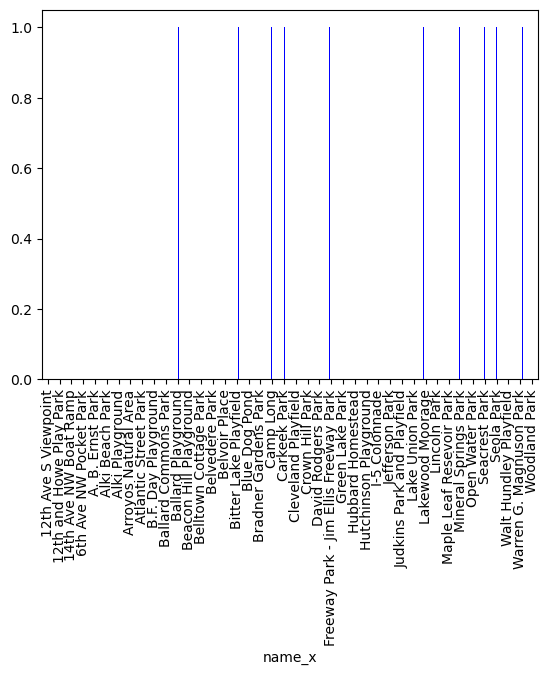

In [196]:
df_pivot.plot.bar(y='feature_id', color='blue', legend=False)

In [167]:
plt.show()

In [198]:
df_pivot

feature_id                 \
feature_desc                          Adult Fitness Equipment BMX Dirt Jumps   
name_x                                                                         
12th Ave S Viewpoint                                        0              0   
12th and Howe Play Park                                     0              0   
14th Ave NW Boat Ramp                                       0              0   
6th Ave NW Pocket Park                                      0              0   
A. B. Ernst Park                                            0              0   
Alki Beach Park                                             0              0   
Alki Playground                                             0              0   
Arroyos Natural Area                                        0              0   
Atlantic Street Park                                        1              0   
B.F. Day Playground                                         0              0   
Ballard Commons Park                                        0              0   
Ballard Playground                                          0              0   
Beacon Hill Playground                                      0              0   
Belltown Cottage Park                                       0              0   
Belvedere Park                                              0              0   
Belvoir Place                                               0              0   
Bitter Lake Playfield                                       0              0   
Blue Dog Pond                                               0              0   
Bradner Gardens Park                                        0              0   
Camp Long                                                   0              0   
Carkeek Park                                                0              0   
Cleveland Playfield                                         0              0   
Crown Hill Park                                             0              0   
David Rodgers Park                                          0              0   
Freeway Park - Jim Ellis Freeway Park                       0              0   
Green Lake Park                                             0              0   
Hubbard Homestead                                           0              0   
Hutchinson Playground                                       0              0   
I-5 Colonnade                                               0              0   
Jefferson Park                                              0              0   
Judkins Park and Playfield                                  0              0   
Lake Union Park                                             0              0   
Lakewood Moorage                                            0              0   
Lincoln Park                                                0              0   
Maple Leaf Resevoir Park                                    0              0   
Mineral Springs Park                                        0              0   
Open Water Park                                             0              0   
Seacrest Park                                               0              0   
Seola Park                                                  0              0   
Walt Hundley Playfield                                      0              0   
Warren G. Magnuson Park                                     0              0   
Woodland Park                                               0              1   

                                                                           \
feature_desc                          Baseball/Softball Basketball (Full)   
name_x                                                                      
12th Ave S Viewpoint                                  0                 0   
12th and Howe Play Park                               0                 0   
14th Ave NW Boat Ramp                                 0          

<Axes: xlabel='None-feature_desc', ylabel='name_x'>

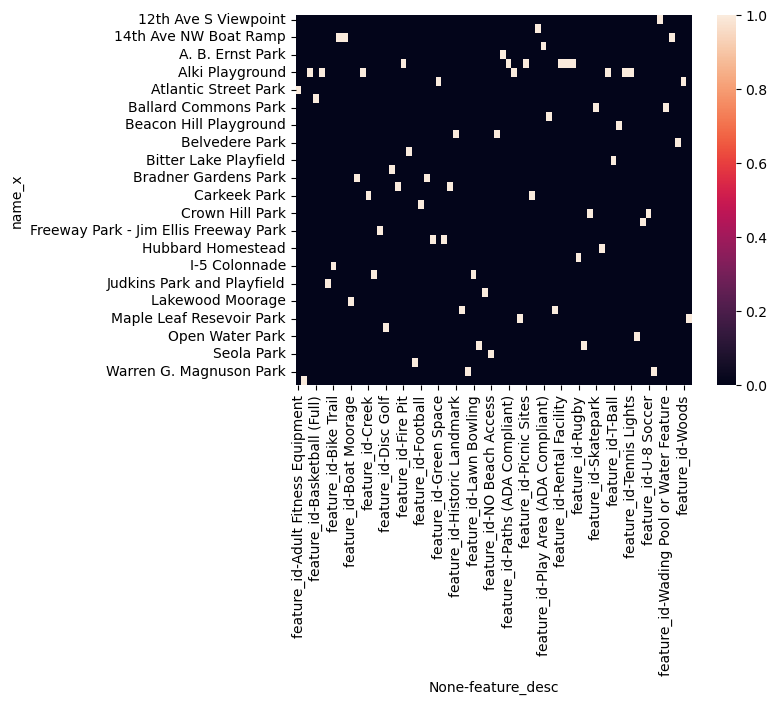

In [197]:
sns.heatmap(df_pivot)

In [199]:
import plotly.express as px


In [ ]:
fig = px.scatter_mapbox(park_features, lat='y coord', lon='x coord',hover_name='name_x', hover_data=['feature_desc'],color_discrete_sequence=['forestgreen'], zoom=10, height=600, width=1000, mapbox_style)